In [1]:
from IPython.display import Audio
import librosa
from librosa import display
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import pylab
from PIL import Image
from matplotlib.pyplot import imshow

%matplotlib inline

In [2]:
y, sr = librosa.load('genres_original/rock/rock.00000.wav', sr = 22050) # Use the default sampling rate of 22,050 Hz

In [3]:
Audio(y, rate=sr)

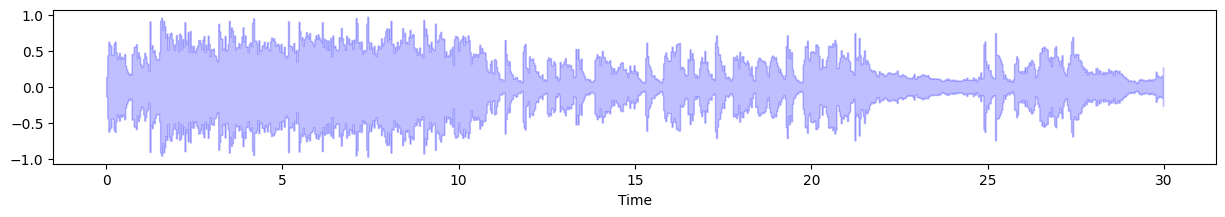

In [4]:
plt.figure(figsize=(15,2))
librosa.display.waveshow(y  = y,
                     sr     = sr, 
                     max_points = 1000, 
                     alpha  = 0.25, 
                     color  = 'blue')

### Apply Pre-emphasis Filter
A pre-emphasis filter is useful in several ways: <br>(1) balance the frequency spectrum since high frequencies usually have smaller magnitudes compared to lower frequencies, <br>(2) avoid numerical problems during the Fourier transform operation and <br>(3) may also improve the Signal-to-Noise Ratio (SNR).<br>
Source: http://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html

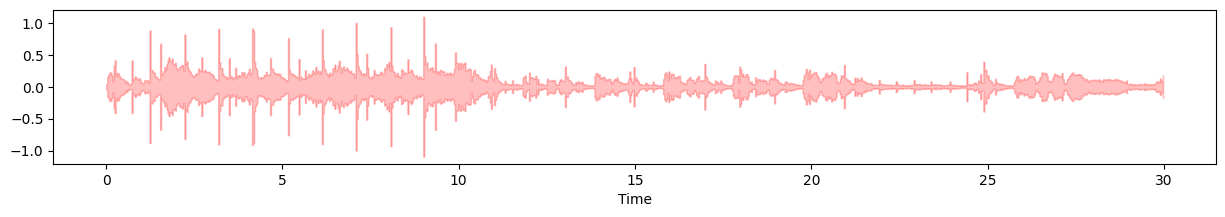

In [5]:
pre_emphasis = 0.97
y = np.append(y[0], y[1:] - pre_emphasis * y[:-1])
plt.figure(figsize=(15,2))
librosa.display.waveshow(y  = y,
                     sr     = sr, 
                     max_points = 1000, 
                     alpha  = 0.25, 
                     color  = 'red')

### Fourier Transform

Figure 1 - Linear Amplitudes (color map)

FT Shape (1025, 1293)


Text(0.5, 1.0, 'Linear Amplitude')

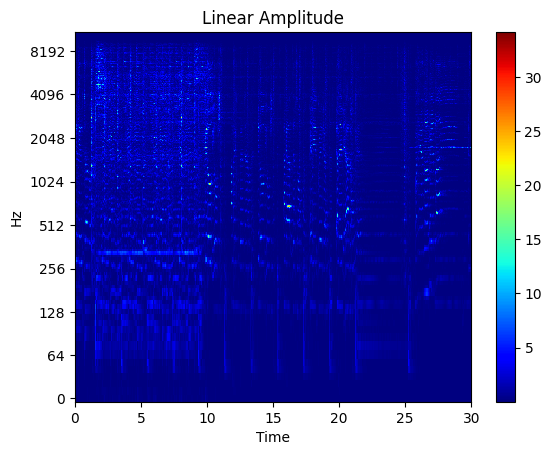

In [6]:
D = librosa.stft(y, n_fft = 2048, hop_length = 512)
print('FT Shape', D.shape)

# Y-axis can be linear or log or mel
librosa.display.specshow(np.abs(D), x_axis='time', y_axis='log', cmap=cm.jet,) # Take magnitude of complex number
plt.colorbar()
plt.title('Linear Amplitude')

Figure 2 - Log Amplitude

C:\Users\Mayesha\AppData\Local\Temp\ipykernel_14724\601615259.py:1: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  log_amplitude = librosa.amplitude_to_db(D, ref=np.max)


Text(0.5, 1.0, 'Log Amplitude')

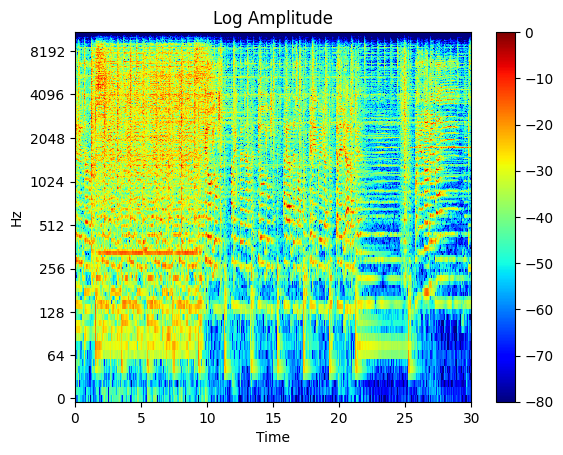

In [8]:
log_amplitude = librosa.amplitude_to_db(D, ref=np.max)

librosa.display.specshow(log_amplitude, x_axis='time', y_axis='log', cmap=cm.jet,)
plt.colorbar()
plt.title('Log Amplitude')

Figure 3 -Log Power (Log power spectrogram seems to be the most informative among the three)

C:\Users\Mayesha\AppData\Local\Temp\ipykernel_14724\1599649211.py:1: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  log_power = librosa.amplitude_to_db(D**2, ref=np.max)


Text(0.5, 1.0, 'Log Power')

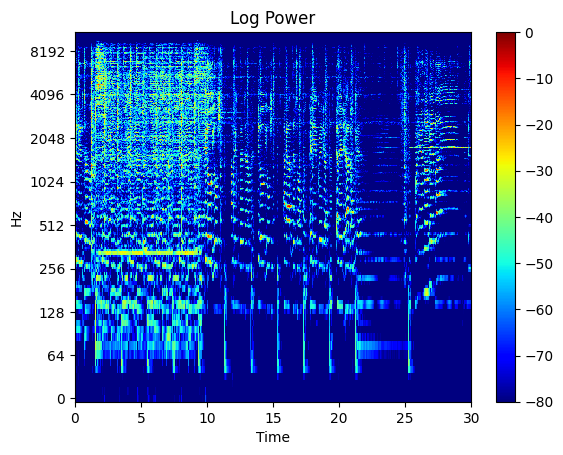

In [10]:
log_power = librosa.amplitude_to_db(D**2, ref=np.max)
librosa.display.specshow(log_power, x_axis='time', y_axis='log', cmap=cm.jet,)
plt.colorbar()
plt.title('Log Power')

### CQT Transform

Transform shape (84, 1293)


C:\Users\Mayesha\AppData\Local\Temp\ipykernel_14724\4284426002.py:3: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  log_power = librosa.amplitude_to_db(C**2, ref=np.max)


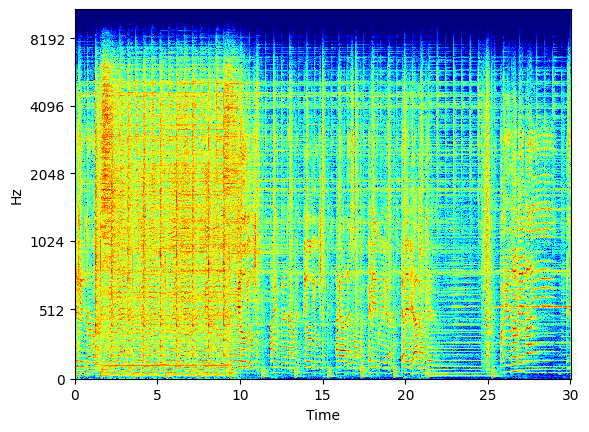

In [11]:
C = librosa.cqt(y, sr=sr, n_bins=84)
print('Transform shape', C.shape) 
log_power = librosa.amplitude_to_db(C**2, ref=np.max)
librosa.display.specshow(log_amplitude, x_axis='time', y_axis='mel', cmap=cm.jet)

### MEL Spectrogram

MEL scale is linear at lower frequency and logarithmic at higher frequency. - more like human hearing perception

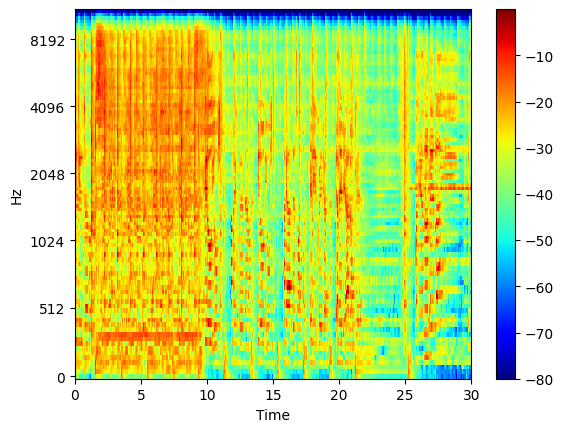

In [12]:
M = librosa.feature.melspectrogram(y=y, sr=sr, fmax=sr/2, n_fft=2048, hop_length=512, 
                                   n_mels=96, power=2) # Power = 2 refers to squared amplitude 
                                                       # Hanning window by default
log_power = librosa.power_to_db(M, ref=np.max) # Covert to dB (log) scale
librosa.display.specshow(log_power, x_axis='time', y_axis='mel', cmap=cm.jet)
plt.colorbar()

In [13]:
pylab.figure(figsize=(3,3))
pylab.axis('off') 
pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
librosa.display.specshow(log_power, cmap=cm.jet)
pylab.savefig('test.jpg', bbox_inches=None, pad_inches=0)
pylab.close()

In [16]:
WAV_DIR = 'genres_original/'
IMG_DIR = 'spectrogram_images/'

In [2]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# Parameters for Mel spectrogram
SAMPLE_RATE = 22050
N_FFT = 2048
HOP_LENGTH = 512
N_MELS = 96

file_path='rock.00001.wav'
y, sr = librosa.load(file_path, sr=SAMPLE_RATE)  # Load audio file
                    
# Compute spectrogram
M = librosa.feature.melspectrogram(y=y, sr=sr, fmax=sr/2, n_fft=2048, hop_length=512, 
                n_mels=96, power=2) # Power = 2 refers to squared amplitude 
                                    # Hanning window by default

# Convert power to dB (log scale)
log_power = librosa.power_to_db(M, ref=np.max)

# Plotting the spectrogram
plt.figure(figsize=(5, 5))
plt.axis('off') 
librosa.display.specshow(log_power, cmap=cm.jet)  # Plot the spectrogram
output_file = os.path.join('rock.00001' + '.jpg')  # Save as .jpg
plt.savefig(output_file, bbox_inches='tight', pad_inches=0)
plt.close()

print(f"Saved spectrogram {output_file}")


Saved spectrogram rock.00001.jpg


In [19]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# Paths
INPUT_DIR = "genres_original"  # Replace with the path to your genres_original directory
OUTPUT_DIR = "spectogram_images"

# Create the output directory if it doesn't exist
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Parameters for Mel spectrogram
SAMPLE_RATE = 22050
N_FFT = 2048
HOP_LENGTH = 512
N_MELS = 96

# Process all genres and files
for genre in os.listdir(INPUT_DIR):
    genre_dir = os.path.join(INPUT_DIR, genre)
    if os.path.isdir(genre_dir):  # Ensure it's a folder
        print(f"Processing genre: {genre}")
        
        # Create subdirectory in output for this genre
        genre_output_dir = os.path.join(OUTPUT_DIR, genre)
        os.makedirs(genre_output_dir, exist_ok=True)
        
        for file in os.listdir(genre_dir):
            if file.endswith(".wav"):  # Process all .wav files
                try:
                    # Read wav-file
                    file_path = os.path.join(genre_dir, file)
                    y, sr = librosa.load(file_path, sr=SAMPLE_RATE)  # Load audio file
                    
                    # Compute spectrogram
                    M = librosa.feature.melspectrogram(y=y, sr=sr, fmax=sr/2, n_fft=2048, hop_length=512, 
                                   n_mels=96, power=2) # Power = 2 refers to squared amplitude 
                                                       # Hanning window by default
                    
                    # Convert power to dB (log scale)
                    log_power = librosa.power_to_db(M, ref=np.max)
                    
                    # Plotting the spectrogram
                    plt.figure(figsize=(5, 5))
                    plt.axis('off') 
                    librosa.display.specshow(log_power, cmap=cm.jet)  # Plot the spectrogram
                    output_file = os.path.join(genre_output_dir, file[:-4] + '.jpg')  # Save as .jpg
                    plt.savefig(output_file, bbox_inches='tight', pad_inches=0)
                    plt.close()
                    
                    print(f"Saved spectrogram for {file} at {output_file}")
                except Exception as e:
                    print(f"Error processing {file}: {e}")


Processing genre: blues
Saved spectrogram for blues.00000.wav at spectogram_images\blues\blues.00000.jpg
Saved spectrogram for blues.00001.wav at spectogram_images\blues\blues.00001.jpg
Saved spectrogram for blues.00002.wav at spectogram_images\blues\blues.00002.jpg
Saved spectrogram for blues.00003.wav at spectogram_images\blues\blues.00003.jpg
Saved spectrogram for blues.00004.wav at spectogram_images\blues\blues.00004.jpg
Saved spectrogram for blues.00005.wav at spectogram_images\blues\blues.00005.jpg
Saved spectrogram for blues.00006.wav at spectogram_images\blues\blues.00006.jpg
Saved spectrogram for blues.00007.wav at spectogram_images\blues\blues.00007.jpg
Saved spectrogram for blues.00008.wav at spectogram_images\blues\blues.00008.jpg
Saved spectrogram for blues.00009.wav at spectogram_images\blues\blues.00009.jpg
Saved spectrogram for blues.00010.wav at spectogram_images\blues\blues.00010.jpg
Saved spectrogram for blues.00011.wav at spectogram_images\blues\blues.00011.jpg
Save

C:\Users\Mayesha\AppData\Local\Temp\ipykernel_14724\827620595.py:36: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SAMPLE_RATE)  # Load audio file
c:\Python310\lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing jazz.00054.wav: 
Saved spectrogram for jazz.00055.wav at spectogram_images\jazz\jazz.00055.jpg
Saved spectrogram for jazz.00056.wav at spectogram_images\jazz\jazz.00056.jpg
Saved spectrogram for jazz.00057.wav at spectogram_images\jazz\jazz.00057.jpg
Saved spectrogram for jazz.00058.wav at spectogram_images\jazz\jazz.00058.jpg
Saved spectrogram for jazz.00059.wav at spectogram_images\jazz\jazz.00059.jpg
Saved spectrogram for jazz.00060.wav at spectogram_images\jazz\jazz.00060.jpg
Saved spectrogram for jazz.00061.wav at spectogram_images\jazz\jazz.00061.jpg
Saved spectrogram for jazz.00062.wav at spectogram_images\jazz\jazz.00062.jpg
Saved spectrogram for jazz.00063.wav at spectogram_images\jazz\jazz.00063.jpg
Saved spectrogram for jazz.00064.wav at spectogram_images\jazz\jazz.00064.jpg
Saved spectrogram for jazz.00065.wav at spectogram_images\jazz\jazz.00065.jpg
Saved spectrogram for jazz.00066.wav at spectogram_images\jazz\jazz.00066.jpg
Saved spectrogram for jazz.000